In [36]:
import os
import sys
sys.path.append(os.path.abspath("/Users/tajo5912/.local/jhub_venv/lib/python3.6/site-packages/"))
import numpy as np
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [51]:
sim = pd.read_csv('/scratch/Users/tajo5912/rbg/test/final_output/test_simulated_md_scores.txt', sep=',', header=None)
sim.columns = ['tf', 'md', 'small_hits', 'large_hits', 'overall', 'heat']
r = pd.DataFrame(sim.tf.str.split('.',2).tolist(),
                                   columns = ['TF','y', 'z'])
sim=sim.join(r)
sim = sim[['TF', 'md', 'small_hits', 'large_hits', 'heat']]

sim_gc= pd.read_csv('/scratch/Users/tajo5912/rbg/test/annotations/simulated_mean_gc_percent.txt', sep='\t', header=None)
sim_gc.columns =['id','mean_gc']

rgc = pd.DataFrame(sim_gc.id.str.split(';',1).tolist(),
                                   columns = ['idcut','TF'])
sim_gc = sim_gc.join(rgc)
sim_gc = sim_gc[['TF', 'mean_gc']]
sim = sim.merge(sim_gc, on='TF')
sim

,TF,md,small_hits,large_hits,heat,mean_gc
0,ZNF93_ZNF93,0.412698,26,63,2;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0;1;...,0.642655
1,CREB3_M10072_1,0.409091,18,44,1;0;0;0;0;0;0;0;0;0;0;0;0;2;0;1;0;0;0;0;0;0;0;...,0.663251
2,ZNF180_ZNF180,0.368421,21,57,1;0;0;1;0;0;0;0;0;2;0;0;0;0;1;0;0;0;0;0;0;1;0;...,0.798764
3,ZNF28_ZNF28,0.355556,16,45,1;0;0;0;0;0;0;0;0;0;0;0;0;1;0;0;1;0;0;0;1;0;0;...,0.761674
4,HKR1_HKR1,0.354839,22,62,1;0;0;0;0;0;0;0;0;0;0;1;0;1;0;0;0;0;0;0;0;0;0;...,0.700883
...,...,...,...,...,...,...
942,HSF5_M09723_1,0.024390,1,41,1;0;1;0;0;0;0;0;3;1;0;0;0;1;0;1;0;1;0;0;2;0;0;...,0.465042
943,SOX8_M06116_1,0.023810,1,42,1;0;0;0;2;0;0;0;0;0;0;1;1;0;0;0;0;1;2;0;0;1;0;...,0.350237
944,DBP_M08771_1,0.023256,1,43,4;0;0;0;1;0;2;0;0;0;1;0;0;0;0;0;0;0;0;0;1;0;0;...,0.494809
945,FOXP1_M08697_1,0.021739,1,46,2;0;0;0;1;0;0;0;0;0;0;1;0;0;0;0;2;0;0;0;0;0;2;...,0.458678


In [52]:
expt = pd.read_csv('/scratch/Users/tajo5912/rbg/test/final_output/levandow_mumerge_bidir_md_scores.txt', sep=',', header=None)
expt.columns = ['tf', 'md', 'small_hits', 'large_hits', 'overall', 'heat']
x = pd.DataFrame(expt.tf.str.split('.',2).tolist(),
                                   columns = ['TF','y', 'z'])
expt=expt.join(x)
expt = expt[['TF', 'md', 'small_hits', 'large_hits', 'heat']]
expt

,TF,md,small_hits,large_hits,heat
0,DBP_M08771_1,0.416667,5,12,2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
1,ELK1_M00977_1,0.337165,88,261,1;0;1;1;1;0;1;0;0;1;1;1;1;1;0;0;0;1;1;2;0;1;0;...
2,MIXL1_M08926_1,0.333333,1,3,1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
3,GATA1_M08711_1,0.333333,2,6,1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...
4,ZBTB33_M06968_1,0.326754,149,456,2;0;1;0;0;0;0;0;0;2;2;0;0;0;0;1;1;1;0;0;0;0;0;...
...,...,...,...,...,...
943,DRGX_M05623_1,0.032787,2,61,2;0;1;0;1;0;2;0;0;3;1;0;0;0;0;0;2;0;0;0;0;1;1;...
944,IRX5_M05857_1,0.031579,3,95,1;1;3;3;2;2;2;0;0;3;1;0;1;0;1;2;1;1;0;2;0;1;0;...
945,ZNF35_M07124_1,0.031311,16,511,5;7;1;8;4;3;5;5;2;8;4;6;4;7;7;8;5;2;4;2;8;4;7;...
946,HOMEZ_M05805_1,0.023256,1,43,2;0;0;1;0;0;0;0;1;2;0;1;0;0;1;0;1;1;0;0;0;1;0;...


In [53]:
df = expt.merge(sim, on='TF', suffixes=('_expt', '_sim'))
df

,TF,md_expt,small_hits_expt,large_hits_expt,heat_expt,md_sim,small_hits_sim,large_hits_sim,heat_sim,mean_gc
0,DBP_M08771_1,0.416667,5,12,2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,0.023256,1,43,4;0;0;0;1;0;2;0;0;0;1;0;0;0;0;0;0;0;0;0;1;0;0;...,0.494809
1,ELK1_M00977_1,0.337165,88,261,1;0;1;1;1;0;1;0;0;1;1;1;1;1;0;0;0;1;1;2;0;1;0;...,0.175000,7,40,1;0;1;0;0;0;0;0;1;2;0;0;0;0;0;1;0;0;0;0;0;2;0;...,0.647556
2,MIXL1_M08926_1,0.333333,1,3,1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,0.238095,5,21,1;0;0;2;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,0.272727
3,GATA1_M08711_1,0.333333,2,6,1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,0.153846,8,52,2;1;1;0;0;1;1;0;0;0;0;0;1;0;1;0;0;0;0;0;0;0;2;...,0.600000
4,ZBTB33_M06968_1,0.326754,149,456,2;0;1;0;0;0;0;0;0;2;2;0;0;0;0;1;1;1;0;0;0;0;0;...,0.127273,7,55,1;0;0;2;0;0;0;1;1;0;0;0;0;0;1;0;0;0;1;0;0;0;0;...,0.659597
...,...,...,...,...,...,...,...,...,...,...
942,DRGX_M05623_1,0.032787,2,61,2;0;1;0;1;0;2;0;0;3;1;0;0;0;0;0;2;0;0;0;0;1;1;...,0.102564,4,39,1;0;1;0;0;0;0;0;1;1;1;0;0;0;1;1;2;0;0;2;1;0;0;...,0.201183
943,IRX5_M05857_1,0.031579,3,95,1;1;3;3;2;2;2;0;0;3;1;0;1;0;1;2;1;1;0;2;0;1;0;...,0.205128,8,39,2;0;0;0;0;0;1;2;1;1;0;0;0;0;1;0;0;0;0;0;0;0;0;...,0.416300
944,ZNF35_M07124_1,0.031311,16,511,5;7;1;8;4;3;5;5;2;8;4;6;4;7;7;8;5;2;4;2;8;4;7;...,0.151515,5,33,2;0;0;0;0;1;0;0;1;1;0;1;1;0;0;0;1;1;0;0;0;0;1;...,0.317333
945,HOMEZ_M05805_1,0.023256,1,43,2;0;0;1;0;0;0;0;1;2;0;1;0;0;1;0;1;1;0;0;0;1;0;...,0.137931,4,29,2;0;2;0;0;0;0;0;0;2;0;1;0;0;0;1;0;0;0;0;1;0;0;...,0.179365


In [142]:
max(df['md_sim'])
#max(df['md_expt'])
df.describe()

,md_expt,small_hits_expt,large_hits_expt,md_sim,small_hits_sim,large_hits_sim,mean_gc
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.134972,438.369588,3585.727561,0.151813,7.277719,46.161563,0.562389
std,0.059506,1424.632299,13906.651023,0.068501,4.127201,8.932581,0.157502
min,0.022222,1.000000,3.000000,0.020408,1.000000,21.000000,0.122596
25%,0.094065,17.000000,158.000000,0.100000,4.000000,40.000000,0.479377
50%,0.127156,55.000000,403.000000,0.142857,6.000000,45.000000,0.568096
75%,0.166160,188.000000,1385.500000,0.195652,9.000000,52.000000,0.663849
max,0.416667,19896.000000,217776.000000,0.412698,26.000000,76.000000,1.000000


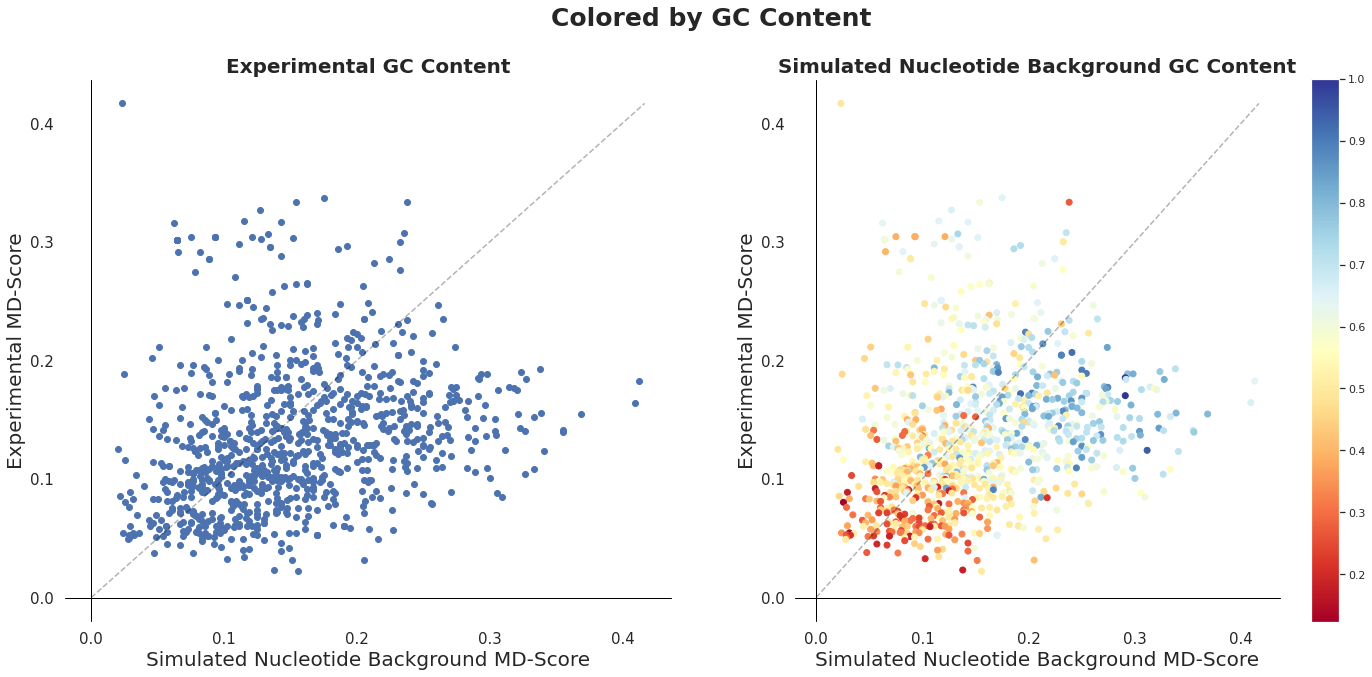

In [141]:
##For GC Content

# import numpy as np
# import matplotlib.pyplot as plt
import matplotlib
# from matplotlib import cm
## from scipy.signal import savgol_filter

cmap = cm.get_cmap('RdYlBu')                                                                                                                        
plt.figure(figsize=(24,10))
gs = plt.GridSpec(1, 2)
x=df['md_sim']
y=df['md_expt']

#colored by experimental gc content
ax = plt.subplot(gs[0])
ax.scatter(x,y)
ax.set_xlabel('Simulated Nucleotide Background MD-Score',fontsize=20)
ax.set_ylabel('Experimental MD-Score',fontsize=20)
ax.plot([0, max(y)], [0, max(y)], color='black', ls='--', alpha=0.3)
ax.patch.set_alpha(0)
ax.axhline(linewidth=1, color='black')
ax.axvline(linewidth=1, color='black')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Experimental GC Content', fontsize=20, fontweight='bold')
# norm = matplotlib.colors.Normalize(vmin=min(df['mean_gc']), vmax=max(df['mean_gc']))
# plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1)

#colored by simulated gc content
ax1 = plt.subplot(gs[1])
ax1.scatter(x,y, cmap=cmap, c = df['mean_gc'])
ax1.set_xlabel('Simulated Nucleotide Background MD-Score',fontsize=20)
ax1.set_ylabel('Experimental MD-Score',fontsize=20)
ax1.plot([0, max(y)], [0, max(y)], color='black', ls='--', alpha=0.3)
ax1.patch.set_alpha(0)
ax1.axhline(linewidth=1, color='black')
ax1.axvline(linewidth=1, color='black')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Simulated Nucleotide Background GC Content', fontsize=20, fontweight='bold')
norm = matplotlib.colors.Normalize(vmin=min(df['mean_gc']), vmax=max(df['mean_gc']))
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1)

plt.suptitle('Colored by GC Content', fontsize=25, fontweight='bold')
plt.show()
# plt.savefig(outdir + '/final_output/' + sample + '_colored_by_gc_content.png',bbox_inches='tight')




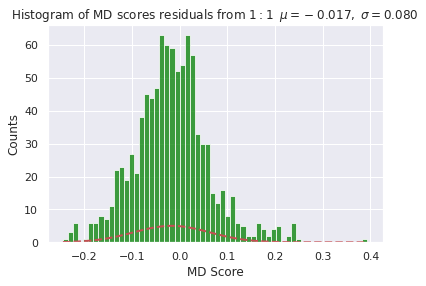

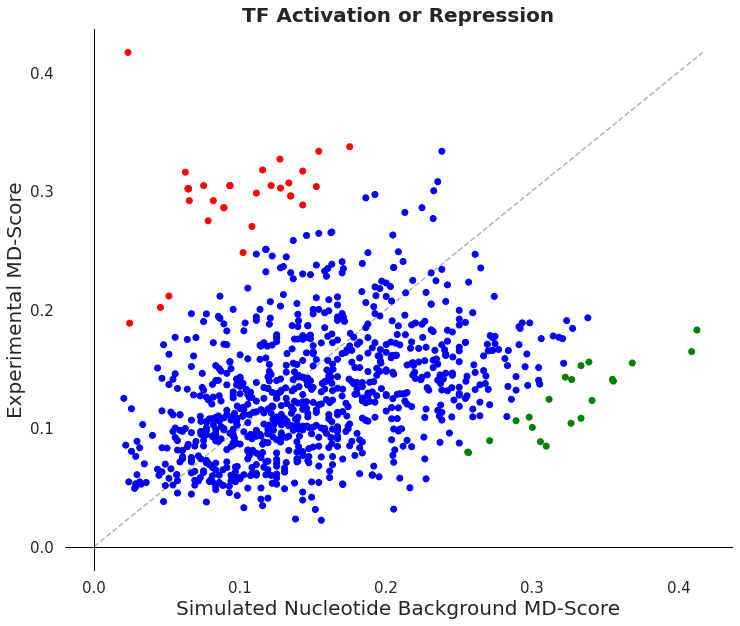

In [182]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from scipy.stats import norm

df['r'] = df['md_expt']-df['md_sim']
rl = list(df['r'])
# best fit of data
(mu, sigma) = norm.fit(rl)
# the histogram of the data
n, bins, patches = plt.hist(rl, 60, facecolor='green', alpha=0.75)

# # add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

# # #plot
#.patch.set_alpha(0)
plt.xlabel('MD Score')
plt.ylabel('Counts')
plt.title(r'$\mathrm{Histogram\ of\ MD\ scores\ residuals\ from\ 1:1\:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.show()                                                                                                                        

def significance(row):
    if (row['r'] < (mu-2*sigma)):
        return 'repressed'
    if (row['r'] > mu+2*sigma):
        return 'activated'
    else:
        return 'none'
    
def color(row):
    if (row['significance'] == 'repressed'):
        return 'green'
    if (row['significance'] == 'activated'):
        return 'red'
    else:
        return 'blue'    
    
df['significance'] = df.apply(lambda row: significance(row), axis=1)
df['significance_color'] =df.apply(lambda row: color(row), axis=1)    

plt.figure(figsize=(12,10))
gs = plt.GridSpec(1, 1)
x=df['md_sim']
y=df['md_expt']
color=df['significance_color']

#colored by activation or depletion
ax = plt.subplot(gs[0])
ax.scatter(x,y,  c=color)
ax.set_xlabel('Simulated Nucleotide Background MD-Score',fontsize=20)
ax.set_ylabel('Experimental MD-Score',fontsize=20)
ax.plot([0, max(y)], [0, max(y)], color='black', ls='--', alpha=0.3)
ax.patch.set_alpha(0)
ax.axhline(linewidth=1, color='black')
ax.axvline(linewidth=1, color='black')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('TF Activation or Repression', fontsize=20, fontweight='bold')


plt.show()
# plt.savefig(outdir + '/final_output/' + sample + '_colored_by_activation_or_depletion.png',bbox_inches='tight')




In [183]:
df

,TF,md_expt,small_hits_expt,large_hits_expt,heat_expt,md_sim,small_hits_sim,large_hits_sim,heat_sim,mean_gc,r,significance,significance_color
0,DBP_M08771_1,0.416667,5,12,2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,0.023256,1,43,4;0;0;0;1;0;2;0;0;0;1;0;0;0;0;0;0;0;0;0;1;0;0;...,0.494809,0.393411,activated,red
1,ELK1_M00977_1,0.337165,88,261,1;0;1;1;1;0;1;0;0;1;1;1;1;1;0;0;0;1;1;2;0;1;0;...,0.175000,7,40,1;0;1;0;0;0;0;0;1;2;0;0;0;0;0;1;0;0;0;0;0;2;0;...,0.647556,0.162165,activated,red
2,MIXL1_M08926_1,0.333333,1,3,1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,0.238095,5,21,1;0;0;2;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,0.272727,0.095238,none,blue
3,GATA1_M08711_1,0.333333,2,6,1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,0.153846,8,52,2;1;1;0;0;1;1;0;0;0;0;0;1;0;1;0;0;0;0;0;0;0;2;...,0.600000,0.179487,activated,red
4,ZBTB33_M06968_1,0.326754,149,456,2;0;1;0;0;0;0;0;0;2;2;0;0;0;0;1;1;1;0;0;0;0;0;...,0.127273,7,55,1;0;0;2;0;0;0;1;1;0;0;0;0;0;1;0;0;0;1;0;0;0;0;...,0.659597,0.199482,activated,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,DRGX_M05623_1,0.032787,2,61,2;0;1;0;1;0;2;0;0;3;1;0;0;0;0;0;2;0;0;0;0;1;1;...,0.102564,4,39,1;0;1;0;0;0;0;0;1;1;1;0;0;0;1;1;2;0;0;2;1;0;0;...,0.201183,-0.069777,none,blue
943,IRX5_M05857_1,0.031579,3,95,1;1;3;3;2;2;2;0;0;3;1;0;1;0;1;2;1;1;0;2;0;1;0;...,0.205128,8,39,2;0;0;0;0;0;1;2;1;1;0;0;0;0;1;0;0;0;0;0;0;0;0;...,0.416300,-0.173549,none,blue
944,ZNF35_M07124_1,0.031311,16,511,5;7;1;8;4;3;5;5;2;8;4;6;4;7;7;8;5;2;4;2;8;4;7;...,0.151515,5,33,2;0;0;0;0;1;0;0;1;1;0;1;1;0;0;0;1;1;0;0;0;0;1;...,0.317333,-0.120204,none,blue
945,HOMEZ_M05805_1,0.023256,1,43,2;0;0;1;0;0;0;0;1;2;0;1;0;0;1;0;1;1;0;0;0;1;0;...,0.137931,4,29,2;0;2;0;0;0;0;0;0;2;0;1;0;0;0;1;0;0;0;0;1;0;0;...,0.179365,-0.114675,none,blue
